# Урок 3. TensorFlow
# Домашнее задание

### <span class="burk">Задание 1.</span>
**Имеются два массива с рукописными буквами и с характеристиками вина. Нужно выбрать датасет, возможно, предварительно обработать, создать модель, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.
При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.**

## Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [44]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [45]:
data = load_wine()

In [46]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [47]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [48]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, multilabel_confusion_matrix

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)
print("Sci-Kit Learn version: ", sklearn.__version__)

TensorFlow version:  2.8.2
Keras version:  2.8.0
Matplotlib version:  3.2.2
Numpy version:  1.21.6
Sci-Kit Learn version:  1.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_images.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
X.shape, y.shape

((1404, 20, 16), (1404,))

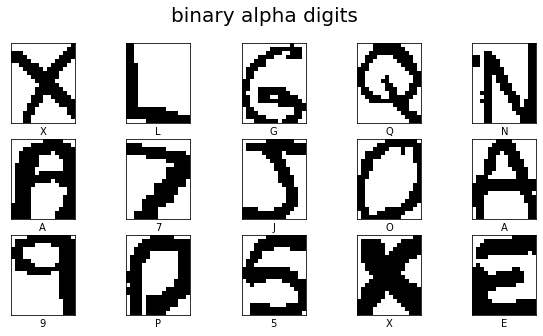

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y,
                                                      shuffle=True,
                                                      test_size=0.2,
                                                      random_state=21,
                                                      stratify=y
                                                      )

In [7]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(1123, 20, 16)
1123
[ 2 14  1 ...  7  2  2]


In [8]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')

(281, 20, 16)
281
[23 20 11 33  9  1  3 25 24 23 18 24 32 19 14 28 16  9 35  5 14 20  1 26
 17  1 16 20 34 22 25 11 31 12 34  3  8 28  6 13  8 29 21 27 15 23  6  9
 11  2 34 18 33 32 31  5 17 12 16 31 20 30 12 35 26  0 24 32  9  4 21 35
 20 21 10 22 27 30 20 32 15 15 17 13 23 28  9 17 27  7 32 29  0 25  0 17
 29  5 34 25 30 29 18 13  2  3 25  2 14 15  8 17  7 18 10 29 18 11 35 27
  4 30 26  4 33 30 15 19 22 19  3 23 25 12  7  2 26 16 21 19  4  3 24 31
 29  2 35 33 22  8 11 24 19 16 28  6  8  5  0 13  4 28 26 26 14 20 18 33
 11 27  9  5 10 10 12  2 30  3  1 31 15  8 28 16  0 19 12  8 32  6 29 24
 11  6 21  2 19 34 20  4  4 17 12 24 17 11 31 13  5 35 34 25  5 22 31 14
 22 29 10 18  7  7 25 34 14 13 15  6 30 27  2 28 14  1 24 33 15  3 12 16
  1 22 14 35 33 26 21  4 10  8  7 30 10  6 21 33  0 16 13 35 19 10  5 26
  0 23 22  9 34 28  1  9 21  0 27  6 23 31  7 32 27]


## Обучение

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
hstr = model.fit(train_images, train_labels, epochs=9, verbose=1)

Epoch 1/9
36/36 [==============================] - 1s 4ms/step - loss: 2.7871 - accuracy: 0.3028
Epoch 2/9
36/36 [==============================] - 0s 4ms/step - loss: 1.3824 - accuracy: 0.6643
Epoch 3/9
36/36 [==============================] - 0s 4ms/step - loss: 0.9532 - accuracy: 0.7471
Epoch 4/9
36/36 [==============================] - 0s 4ms/step - loss: 0.7255 - accuracy: 0.7979
Epoch 5/9
36/36 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.8486
Epoch 6/9
36/36 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.8736
Epoch 7/9
36/36 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.9003
Epoch 8/9
36/36 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.9350
Epoch 9/9
36/36 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9537


In [37]:
hstr.history

{'accuracy': [0.30276045203208923,
  0.6642920970916748,
  0.7471059560775757,
  0.7978628873825073,
  0.8486197590827942,
  0.8735529780387878,
  0.9002671241760254,
  0.9349955320358276,
  0.9536954760551453],
 'loss': [2.7871339321136475,
  1.3823736906051636,
  0.9532217383384705,
  0.7254570722579956,
  0.5673330426216125,
  0.4656907320022583,
  0.3751522898674011,
  0.29233887791633606,
  0.22676490247249603]}

In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 320)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               41088     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 36)                9252      
                                                                 
Total params: 99,876
Trainable params: 99,876
Non-trainable params: 0
_________________________________________________________________


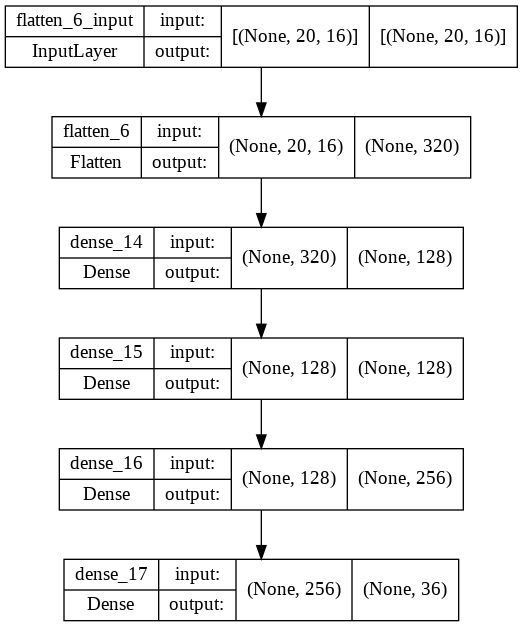

In [39]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [40]:
model.predict(test_images)

array([[-2.2709649 , -1.5966699 , -4.5147734 , ...,  2.1620312 ,
         2.4313376 , -4.1636887 ],
       [-4.8235097 ,  0.62785274, -5.0027304 , ...,  4.189828  ,
         3.570388  , -0.6936084 ],
       [-0.48572448,  1.5394822 , -2.4049444 , ..., -0.47264233,
        -3.390039  , -1.2827586 ],
       ...,
       [-1.1946322 ,  0.4510166 ,  0.29642278, ...,  0.29048964,
         3.894626  ,  2.749915  ],
       [ 2.3317533 , -0.17972939,  1.9463257 , ..., -2.610443  ,
        -5.201926  , -0.42306194],
       [-0.96037126,  0.44096527, -3.3073497 , ...,  3.121016  ,
        -0.53384936,  0.4917567 ]], dtype=float32)

In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [42]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[1.6299175e-05 3.1989537e-05 1.7285893e-06 1.0484325e-04 8.2326087e-04
 1.1048137e-06 6.0524739e-04 3.3090153e-05 6.7704481e-05 5.7596545e-04
 2.3195554e-02 1.9636702e-05 5.1153995e-07 1.2485913e-04 5.3889448e-06
 2.9967619e-05 6.8823225e-05 1.1366028e-01 2.7763149e-06 3.8618570e-08
 2.3548587e-03 3.0755985e-04 7.7105373e-02 4.5524269e-01 4.0670307e-05
 3.3822407e-03 3.9099145e-04 3.6113858e-04 1.1139765e-05 8.4644796e-07
 8.1772795e-03 1.8135695e-03 3.0827183e-01 1.3721171e-03 1.7961779e-03
 2.4556471e-06]
23
23
